In [2]:
from utils import run
import seaborn as sns
from distributions import Uniform, Zipfian, HotSet
from kevo import LSMTree, AppendLog, HybridLog, MemOnly, PathReplica

In [47]:
base_dir = './benchmark_data_'
replica = PathReplica(base_dir + LSMTree.name, '/tmp/remote')

df = run(
    [4], [4], [100], [100_000],
    [Uniform], [{'seed': [1]}],
    [LSMTree], [{
        'max_runs_per_level': list(range(2, 11, 2)),
        'density_factor': [10],
        'memtable_bytes_limit': [100_000],
        'replica': [replica, None]
    }],
    times=5, base_dir=base_dir,
    measure_cpu=True, measure_mem=True, measure_write=True,
    measure_read=True, measure_recovery=True, measure_disk_local=True,
    measure_disk_remote=True,
    return_df=True
)
df

,klen,vlen,n_ops,n_items,distro,seed,items,engine,max_runs_per_level,density_factor,memtable_bytes_limit,replica,data_dir,max_key_len,max_value_len,metric,value
0,4,4,100000,100,Uniform,1,100,LSMTree,2,10,100000,<kevo.replication.PathReplica object at 0x7fa1...,./benchmark_data_LSMTree,4,4,write,0.081
1,4,4,100000,100,Uniform,1,100,LSMTree,2,10,100000,<kevo.replication.PathReplica object at 0x7fa1...,./benchmark_data_LSMTree,4,4,mem,10642
2,4,4,100000,100,Uniform,1,100,LSMTree,2,10,100000,<kevo.replication.PathReplica object at 0x7fa1...,./benchmark_data_LSMTree,4,4,disk_local,2644
3,4,4,100000,100,Uniform,1,100,LSMTree,2,10,100000,<kevo.replication.PathReplica object at 0x7fa1...,./benchmark_data_LSMTree,4,4,disk_remote,25287
4,4,4,100000,100,Uniform,1,100,LSMTree,2,10,100000,<kevo.replication.PathReplica object at 0x7fa1...,./benchmark_data_LSMTree,4,4,recovery,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,4,4,100000,100,Uniform,1,100,LSMTree,10,10,100000,None,./benchmark_data_LSMTree,4,4,mem,13802
321,4,4,100000,100,Uniform,1,100,LSMTree,10,10,100000,None,./benchmark_data_LSMTree,4,4,disk_local,135477
322,4,4,100000,100,Uniform,1,100,LSMTree,10,10,100000,None,./benchmark_data_LSMTree,4,4,recovery,0.008
323,4,4,100000,100,Uniform,1,100,LSMTree,10,10,100000,None,./benchmark_data_LSMTree,4,4,read,0.016


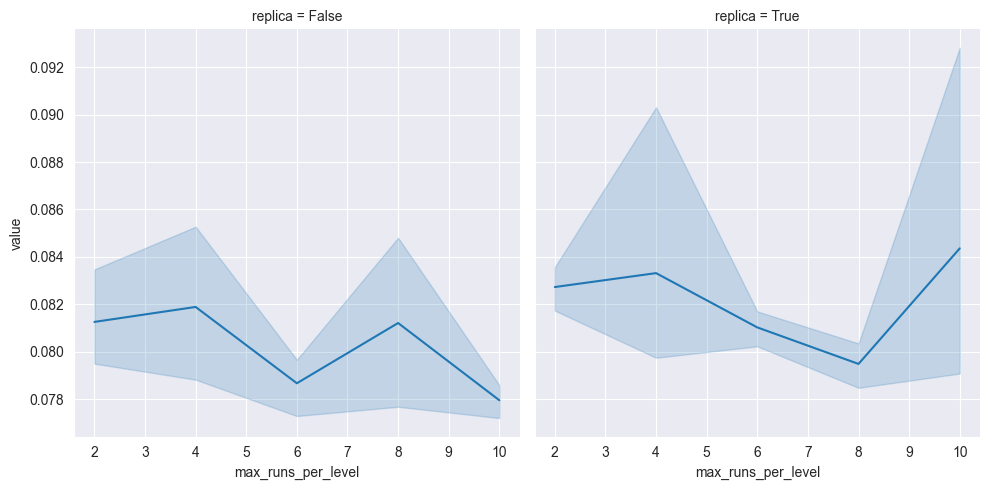

In [54]:
data = df[df['metric'] == 'write'][['replica', 'value', 'max_runs_per_level']]
data['replica'] = data['replica'].apply(lambda x: x is not None)
data['value'] = data['value'].astype(float)

# relplot
plot = sns.relplot(data, x='max_runs_per_level', y='value', col='replica', kind='line')
# plot.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
# plot.fig.suptitle('My Title')

#lineplot
# plot.set_title('My plot')
# plot.set_xlabel('asdf')
# fig = plot.get_figure()
# fig.savefig("out.png")

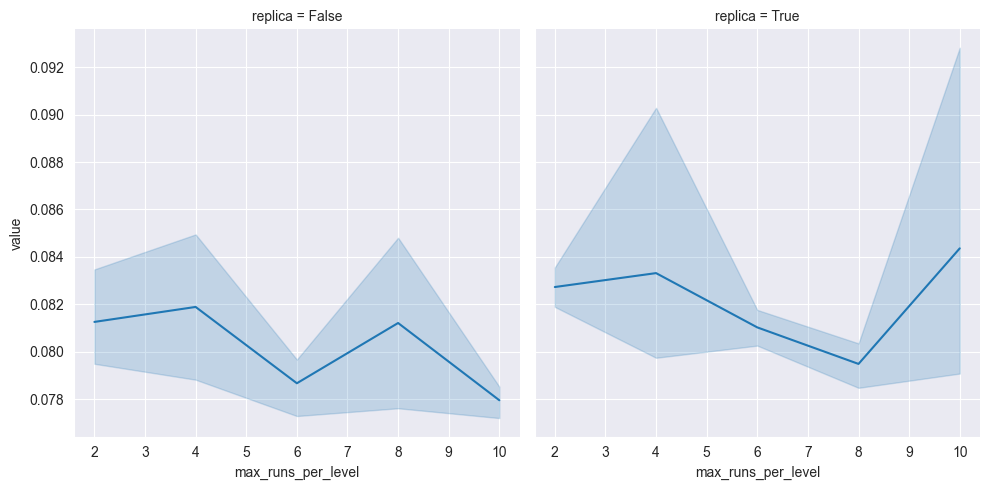

In [49]:
plot = sns.relplot(data, x='max_runs_per_level', y='value', col='replica', kind='line')